
# **Introduction to Keras using a TensorFlow 2.0 Backend**

TensorFlow 2.0 백엔드를 사용한 Keras 소개

### **Training a Simple CNN on the MNIST Dataset - Handwrittent Digits**


MNIST 데이터셋에 대한 간단한 CNN 훈련 - 수기 숫자

---



---
이 수업에서는 TensorFlow 2.0**와 함께 **Keras를 사용하여 PyTorch에서 **단순 컨볼루션 신경망 모델**을 만들고 MNIST 데이터 세트에서 필기 숫자를 **인식하도록 훈련한다.**
1. MNIST 데이터 세트 로드
2. 데이터 세트 검사
3. 이미지 데이터 세트 시각화
5. 데이터 세트 전처리
6. 모델 구축
7. 모델 교육
8. 교육 로그를 작성하는 중
9. 모델 저장 및 로드
10. 테스트 데이터에 대한 모델 테스트


In this lesson, we use **Keras with a TensorFlow 2.0** Backend to to create a **simple Convolutional Neural Network model** in PyTorch and train it to **recognize handwritten digits in the MNIST dataset.**
1. Loading our MNIST dataset
2. Inspecting our dataset
3. Visualizing our image dataset
5. Preprocessing our dataset
6. Building our Model
7. Training our Model
8. Plotting our training logs
9. Saving and Loading our Model
10. Testing our model on test data

## **1. Loading our Data**

There are built in datasets from ```tensorflow.keras.datasets``` to load our data. We use the ```mnist.load_data()``` function.

Returns: **2 tuples**
- x_train, x_test: uint8 array of RGB image data with shape (num_samples, 3, 32, 32) or (num_samples, 32, 32, 3) based on the image_data_format backend setting of either channels_first or channels_last respectively.
- y_train, y_test: uint8 array of category labels (integers in range 0-9) with shape (num_samples, 1).

- More info on available datases at https://keras.io/datasets/

In [1]:
# 내장된 데이터셋을 이 함수에서 로드할 수 있습니다
from tensorflow.keras.datasets import mnist

# MNIST 학습 및 테스트 데이터셋을 로드합니다
(x_train, y_train), (x_test, y_test) = mnist.load_data()


11490434/11490434 [==============================] - 0s 0us/step


#### **A quick check to see if we're using the GPU**

In [2]:
# GPU를 사용하고 있는지 확인합니다
from tensorflow.python.client import device_lib

print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 14418376614375249151
xla_global_id: -1
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 14626652160
locality {
  bus_id: 1
  links {
  }
}
incarnation: 9573902633821111103
physical_device_desc: "device: 0, name: Tesla T4, pci bus id: 0000:00:04.0, compute capability: 7.5"
xla_global_id: 416903419
]


## **2. Inspecting our dataset**

In [3]:
# 학습 데이터(x_train)의 초기 형태 또는 차원을 출력합니다
print("Initial shape or dimensions of x_train", str(x_train.shape))

# 데이터 샘플의 개수를 출력합니다
print("Number of samples in our training data: " + str(len(x_train)))
print("Number of labels in our training data: " + str(len(y_train)))
print("Number of samples in our test data: " + str(len(x_test)))
print("Number of labels in our test data: " + str(len(y_test)))

# 학습 및 테스트 데이터의 이미지 차원과 레이블 개수를 출력합니다
print("\n")
print("Dimensions of x_train:" + str(x_train[0].shape))
print("Labels in x_train:" + str(y_train.shape))
print("\n")
print("Dimensions of x_test:" + str(x_test[0].shape))
print("Labels in y_test:" + str(y_test.shape))


Initial shape or dimensions of x_train (60000, 28, 28)
Number of samples in our training data: 60000
Number of labels in our training data: 60000
Number of samples in our test data: 10000
Number of labels in our test data: 10000


Dimensions of x_train:(28, 28)
Labels in x_train:(60000,)


Dimensions of x_test:(28, 28)
Labels in y_test:(10000,)


## **3. Visualizing our image dataset**

Let's take a look at some of images in this dataset
- Using OpenCV
- Using Matplotlib

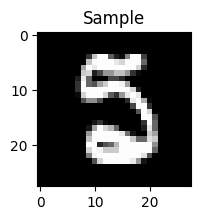

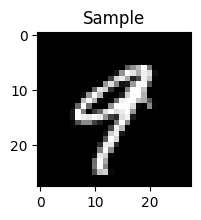

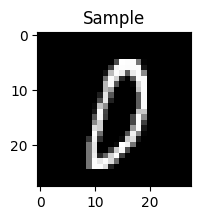

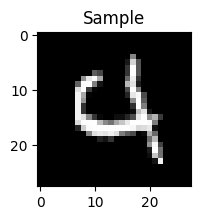

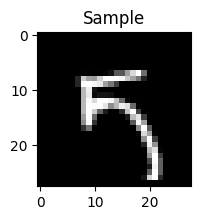

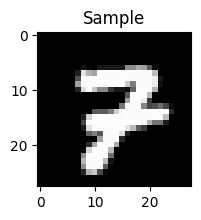

In [4]:
# OpenCV와 NumPy를 임포트합니다
import cv2
import numpy as np
from matplotlib import pyplot as plt

# 이미지를 화면에 표시하는 함수 정의
def imshow(title, image = None, size = 6):
    if image.any():  # 이미지가 존재하는 경우
        w, h = image.shape[0], image.shape[1]  # 이미지의 높이와 너비를 가져옴
        aspect_ratio = w/h  # 가로세로 비율 계산
        plt.figure(figsize=(size * aspect_ratio, size))  # 이미지 비율에 맞게 그림 크기 설정
        plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))  # 이미지를 BGR에서 RGB로 변환하여 표시
        plt.title(title)  # 제목 설정
        plt.show()  # 이미지 출력
    else:
        print("Image not found")  # 이미지가 없는 경우 메시지 출력

# OpenCV를 사용하여 데이터셋에서 무작위로 선택한 6개의 이미지를 표시
for i in range(0, 6):
    random_num = np.random.randint(0, len(x_train))  # 데이터셋에서 무작위 인덱스 선택
    img = x_train[random_num]  # 무작위로 선택한 인덱스의 이미지 가져오기
    imshow("Sample", img, size = 2)  # 이미지를 화면에 표시


### **Let's do the same thing but using matplotlib to plot 6 images**

<Figure size 640x480 with 0 Axes>

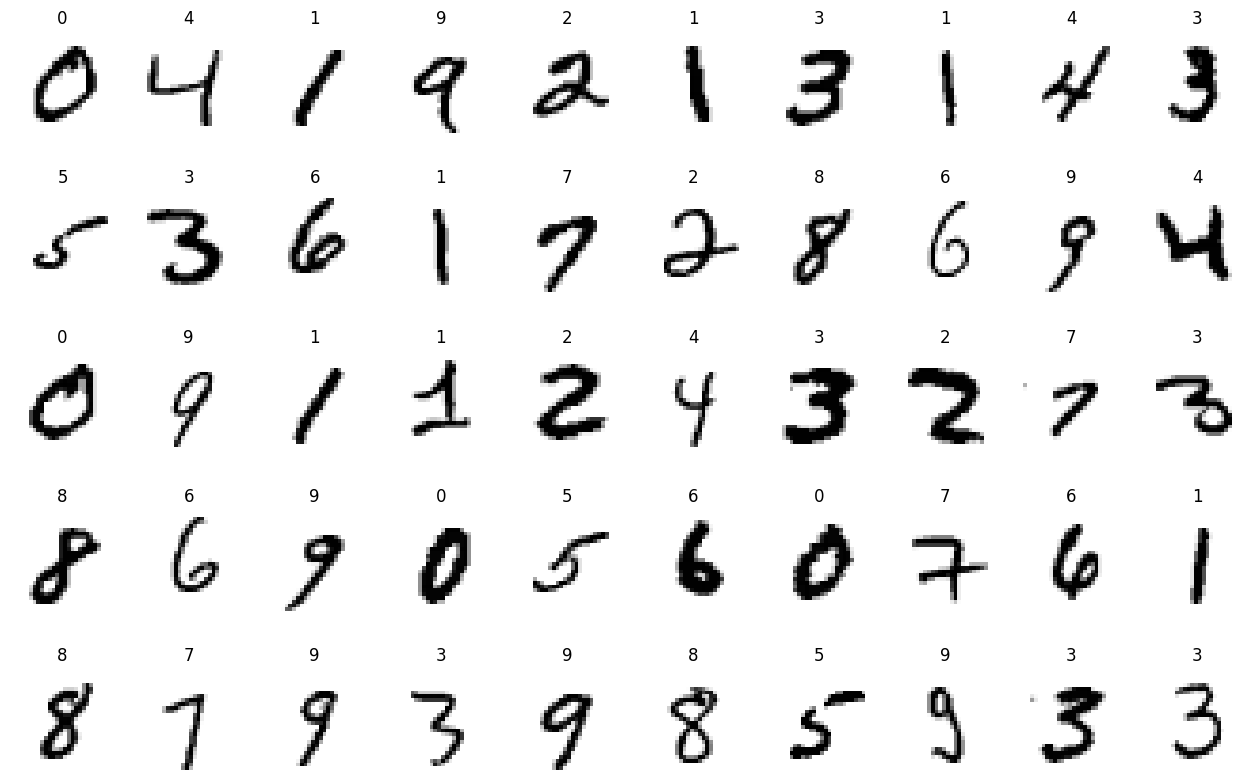

In [5]:
# MNIST 학습 데이터셋의 처음 50개 이미지를 시각화합니다
import matplotlib.pyplot as plt

# 그림을 생성하고 크기를 변경합니다
figure = plt.figure()
plt.figure(figsize=(16, 10))

# 표시할 이미지의 개수를 설정합니다
num_of_images = 50

# 1부터 50까지 인덱스를 반복합니다
for index in range(1, num_of_images + 1):
    plt.subplot(5, 10, index).set_title(f'{y_train[index]}')  # 5행 10열의 서브플롯에 각 이미지의 레이블을 제목으로 설정
    plt.axis('off')  # 축을 끕니다
    plt.imshow(x_train[index], cmap='gray_r')  # 이미지를 'gray_r' 컬러맵을 사용하여 흑백으로 표시


## **4. Preprocessing our dataset**

Before passing our data to our CNN for training, we need to prepare it firstly. This entials:
1. Reshaping our data by adding a 4th Dimension
2. Changing our datatype from uint8 to float32
3. Normalizing our data to values between 0 and 1
4. One hot encoding

## **4. 데이터셋 전처리**

훈련을 위해 CNN에 데이터를 전달하기 전에 먼저 데이터를 준비해야 합니다. 이 항목은 다음과 같습니다:
1. 4차원을 추가하여 데이터 재구성
2. uint8에서 float32로 데이터 유형 변경
3. 데이터를 0에서 1 사이의 값으로 정규화하는 중
4. 핫 인코딩 하나


In [6]:
# 이미지의 행과 열 수를 저장합니다
img_rows = x_train[0].shape[0]
img_cols = x_train[0].shape[1]

# Keras에서 필요한 '형태'로 데이터를 맞춥니다
# 데이터에 4번째 차원을 추가하여 (60000, 28, 28) 형태의 원래 이미지 모양을 (60000, 28, 28, 1)로 변경합니다
x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)

# 단일 이미지의 형태를 저장합니다
input_shape = (img_rows, img_cols, 1)

# 이미지 데이터를 float32 데이터 타입으로 변경합니다 (원래는 uint8)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

# 데이터를 정규화하여 범위를 (0에서 255)에서 (0에서 1)로 변경합니다
x_train /= 255.0
x_test /= 255.0

# 전처리된 데이터의 형태를 출력합니다
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')


x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


In [7]:
print(img_rows, img_cols)

28 28


#### **One Hot Encode Our Labels (Y)**

We can easily implement this transformm using ```to_categorical``` from ``` tensorflow.keras.utils```

In [8]:
from tensorflow.keras.utils import to_categorical

# 이제 출력값을 원-핫 인코딩합니다
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

# 원-핫 인코딩된 행렬의 열 수를 셉니다
print("Number of Classes: " + str(y_test.shape[1]))

# 클래스 수를 저장합니다
num_classes = y_test.shape[1]

# 이미지의 총 픽셀 수를 저장합니다
num_pixels = x_train.shape[1] * x_train.shape[2]


Number of Classes: 10


#### **Example of One Hot Encoding**
![Image of one hot ncoding](https://raw.githubusercontent.com/rajeevratan84/DeepLearningCV/master/hotoneencode.JPG)

In [9]:
# Look at our raw data
y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

## **5. Building Our Model**

![](https://github.com/rajeevratan84/ModernComputerVision/raw/main/CleanShot%202020-11-29%20at%204.21.04%402x.png)
- We're constructing a simple but effective CNN that uses 32 filters of size 3x3
- We've added a 2nd CONV layer of 64 filters of the same size 3x3
- We then downsample our data to 2x2
- We then flatten our Max Pool output that is connected to a Dense/FC layer that has an output size of 128
- Then we connect our 128 outputs to another FC/Dense layer that outputs to the 10 categorical units

In [10]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras import backend as K
from tensorflow.keras.optimizers import SGD

# 모델 생성
model = Sequential()

# 첫 번째 합성곱 층, 필터 크기는 32로 층 크기를 26 x 26 x 32로 줄입니다.
# ReLU 활성화 함수를 사용하고 입력 형태는 28 x 28 x 1로 지정합니다.
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape))

# 두 번째 합성곱 층, 필터 크기는 64로 층 크기를 24 x 24 x 64로 줄입니다.
model.add(Conv2D(64, (3, 3), activation='relu'))

# MaxPooling을 사용하여 커널 크기 2 x 2로 크기를 12 x 12 x 64로 줄입니다.
model.add(MaxPooling2D(pool_size=(2, 2)))

# Dense 층에 입력하기 전에 텐서 객체를 평탄화합니다.
# 텐서를 평탄화하면 텐서에 포함된 요소 수에 해당하는 형태로 텐서가 재구성됩니다.
# CNN에서는 12 * 12 * 64에서 9216 * 1로 변환됩니다.
model.add(Flatten())

# 이 층을 크기 1 * 128의 완전 연결(Dense) 층에 연결합니다.
model.add(Dense(128, activation='relu'))

# 최종 완전 연결(Dense) 층을 각 클래스(10개)에 대한 출력으로 생성합니다.
model.add(Dense(num_classes, activation='softmax'))

# 모델을 컴파일합니다. 이는 우리가 방금 생성한 모델을 저장하는 객체를 만듭니다.
# 옵티마이저로 확률적 경사 하강법(SGD, 학습률 0.001)을 사용합니다.
# 손실 함수는 다중 클래스 문제에 적합한 categorical_crossentropy로 설정합니다.
# 마지막으로, 성능을 평가할 메트릭으로 정확도를 설정합니다.
model.compile(loss='categorical_crossentropy',
              optimizer=SGD(0.001),
              metrics=['accuracy'])

# summary 함수를 사용하여 모델의 층과 매개변수를 표시할 수 있습니다.
print(model.summary())


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 64)        18496     
                                                                 
 max_pooling2d (MaxPooling2  (None, 12, 12, 64)        0         
 D)                                                              
                                                                 
 flatten (Flatten)           (None, 9216)              0         
                                                                 
 dense (Dense)               (None, 128)               1179776   
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                        

#### **Same code as above, but without the superfluous comments**

In [11]:
y_test.shape

(10000, 10)

In [12]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras import backend as K
from tensorflow.keras.optimizers import SGD

model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss = 'categorical_crossentropy',
              optimizer = SGD(0.001),
              metrics = ['accuracy'])

## **6. Training our Model**
- Our preprocessed data is used as the input
- We set the batch size to 128 (or any number ranging from 8 to 256 is good)
- We set the number of epochs to 2, this is just for this tutorial purpose, but a value for at least 10 should be used
- We store our model's training results for plotting in future
- We then use Kera's molel.evaluate function to output the model's final performance. Here we are examing Test Loss and Test Accuracy

In [13]:
batch_size = 128
epochs = 25

# 나중에 결과를 시각화하기 위해 저장합니다.
# fit 함수에서는 학습 데이터(x_train & y_train),
# 배치 크기(일반적으로 RAM에 따라 16에서 128),
# 에포크 수(일반적으로 10에서 100) 및 검증 데이터셋(x_test & y_test)을 지정합니다.
# verbose = 1은 각 에포크마다 성능 지표를 출력하도록 설정합니다.
history = model.fit(x_train,
                    y_train,
                    batch_size = batch_size,
                    epochs = epochs,
                    verbose = 1,
                    validation_data = (x_test, y_test))

# evaluate 함수를 사용하여 정확도 점수를 얻습니다.
# score에는 두 가지 값, 테스트 손실과 정확도가 저장됩니다.
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])


Epoch 1/25
469/469 [==============================] - 8s 9ms/step - loss: 2.1794 - accuracy: 0.4145 - val_loss: 1.9869 - val_accuracy: 0.6300
Epoch 2/25
469/469 [==============================] - 4s 8ms/step - loss: 1.4800 - accuracy: 0.7074 - val_loss: 0.8768 - val_accuracy: 0.8214
Epoch 3/25
469/469 [==============================] - 4s 8ms/step - loss: 0.6491 - accuracy: 0.8421 - val_loss: 0.4801 - val_accuracy: 0.8744
Epoch 4/25
469/469 [==============================] - 3s 7ms/step - loss: 0.4476 - accuracy: 0.8766 - val_loss: 0.3865 - val_accuracy: 0.8924
Epoch 5/25
469/469 [==============================] - 4s 8ms/step - loss: 0.3831 - accuracy: 0.8899 - val_loss: 0.3441 - val_accuracy: 0.9004
Epoch 6/25
469/469 [==============================] - 4s 8ms/step - loss: 0.3489 - accuracy: 0.8983 - val_loss: 0.3211 - val_accuracy: 0.9068
Epoch 7/25
469/469 [==============================] - 3s 7ms/step - loss: 0.3258 - accuracy: 0.9049 - val_loss: 0.2992 - val_accuracy: 0.9147
Epoch 

## **7. Ploting our Loss and Accuracy Charts**

In [14]:
history_dict = history.history
history_dict

{'loss': [2.1793808937072754,
  1.4799803495407104,
  0.6490650177001953,
  0.4476141929626465,
  0.3830893039703369,
  0.3489281237125397,
  0.32580697536468506,
  0.3075628876686096,
  0.29231107234954834,
  0.2796228528022766,
  0.2683228552341461,
  0.25841382145881653,
  0.24904341995716095,
  0.2405172884464264,
  0.2327033132314682,
  0.22541551291942596,
  0.21859736740589142,
  0.21220700442790985,
  0.20613396167755127,
  0.2004556804895401,
  0.19526872038841248,
  0.18988625705242157,
  0.18509475886821747,
  0.18067365884780884,
  0.17624066770076752],
 'accuracy': [0.4145333468914032,
  0.7073500156402588,
  0.8420833349227905,
  0.8766166567802429,
  0.8899000287055969,
  0.8982833623886108,
  0.9049000144004822,
  0.9097499847412109,
  0.9150833487510681,
  0.9184666872024536,
  0.9217000007629395,
  0.9248666763305664,
  0.927299976348877,
  0.9297166466712952,
  0.9320833086967468,
  0.9341999888420105,
  0.9360666871070862,
  0.9380833506584167,
  0.9403166770935059,

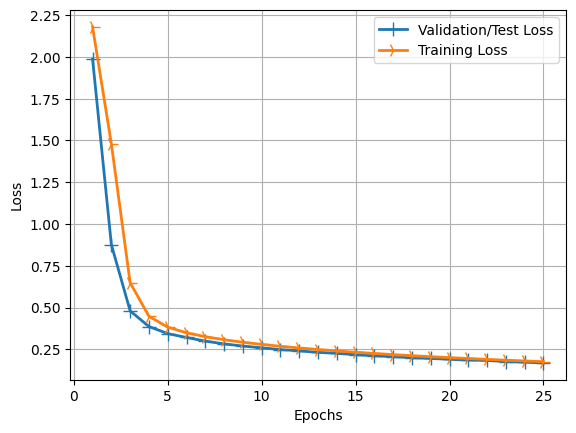

In [15]:
# 손실 차트를 시각화합니다
import matplotlib.pyplot as plt

# 학습 중 저장된 성능 결과를 가져오기 위해 History 객체를 사용합니다
history_dict = history.history

# 손실 값과 검증 손실 값을 추출합니다
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

# 에포크 수를 가져와서 해당 수만큼의 배열을 생성합니다
epochs = range(1, len(loss_values) + 1)

# 검증 손실과 학습 손실에 대한 라인 차트를 그립니다
line1 = plt.plot(epochs, val_loss_values, label='Validation/Test Loss')
line2 = plt.plot(epochs, loss_values, label='Training Loss')
plt.setp(line1, linewidth=2.0, marker = '+', markersize=10.0)  # 첫 번째 라인 설정
plt.setp(line2, linewidth=2.0, marker = '4', markersize=10.0)  # 두 번째 라인 설정
plt.xlabel('Epochs')  # x축 레이블 설정
plt.ylabel('Loss')  # y축 레이블 설정
plt.grid(True)  # 그리드 설정
plt.legend()  # 범례 설정
plt.show()  # 차트 출력


#### **Our Accuracy Charts**

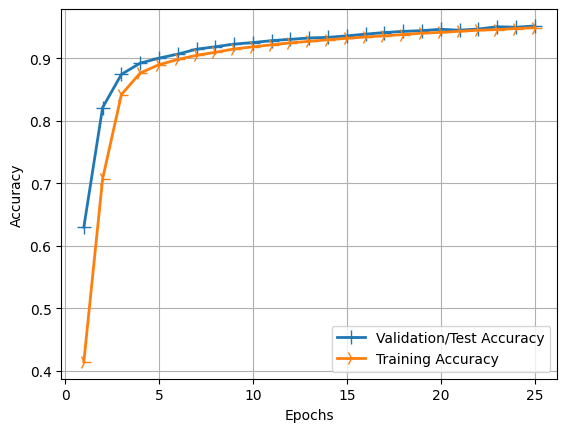

In [16]:
# 정확도 차트를 시각화합니다
import matplotlib.pyplot as plt

# 학습 중 저장된 성능 결과를 가져오기 위해 History 객체를 사용합니다
history_dict = history.history

# 정확도 값과 검증 정확도 값을 추출합니다
acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']
epochs = range(1, len(loss_values) + 1)

# 검증 정확도와 학습 정확도에 대한 라인 차트를 그립니다
line1 = plt.plot(epochs, val_acc_values, label='Validation/Test Accuracy')
line2 = plt.plot(epochs, acc_values, label='Training Accuracy')
plt.setp(line1, linewidth=2.0, marker = '+', markersize=10.0)  # 첫 번째 라인 설정
plt.setp(line2, linewidth=2.0, marker = '4', markersize=10.0)  # 두 번째 라인 설정
plt.xlabel('Epochs')  # x축 레이블 설정
plt.ylabel('Accuracy')  # y축 레이블 설정
plt.grid(True)  # 그리드 설정
plt.legend()  # 범례 설정
plt.show()  # 차트 출력


## **8. Saving and Loadng our Model**

**Saving our Model is simple, just use:**

 ```model.save("model_file_name.h5")```

In [17]:
model.save("mnist_simple_cnn_10_Epochs.h5")
print("Model Saved")

Model Saved


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


**Loading our Saved Model is also simple, just use:**

```load_model(model_file_name.h5)```

In [21]:
# We need to import our load_model function
from tensorflow.keras.models import load_model

classifier = load_model('mnist_simple_cnn_10_Epochs.h5')

##  **9. Getting Predictions from our sample Test Data**

**Predicting all test data**

In [19]:
#x_test = x_test.reshape(10000,28,28,1)
print(x_test.shape)

print("Predicting classes for all 10,000 test images...")

pred = np.argmax(classifier.predict(x_test), axis=-1)
print("Completed.\n")

print(pred)
print(type(pred))
print(len(pred))

(10000, 28, 28, 1)
Predicting classes for all 10,000 test images...
313/313 [==============================] - 1s 2ms/step
Completed.

[7 2 1 ... 4 5 6]
<class 'numpy.ndarray'>
10000


**Predicting an individual test image**

In [20]:
# x_test의 첫 번째 이미지(인덱스 0)를 가져와서 그 형태를 출력합니다
input_im = x_test[0]
print(input_im.shape)

# 첫 번째 축에 4번째 차원을 추가해야 합니다
input_im = input_im.reshape(1, 28, 28, 1)
print(input_im.shape)

# 이제 해당 단일 이미지에 대한 예측을 얻습니다
pred = np.argmax(classifier.predict(input_im), axis=-1)
print(pred)
print(type(pred))
print(len(pred))


(28, 28, 1)
(1, 28, 28, 1)
1/1 [==============================] - 0s 109ms/step
[7]
<class 'numpy.ndarray'>
1


### **Now let's do something fancy, let's put the predicted label on an image with the test data image**

1/1 [==============================] - 0s 74ms/step


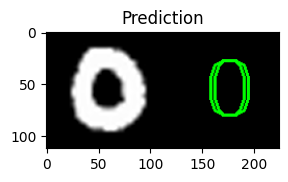

1/1 [==============================] - 0s 19ms/step


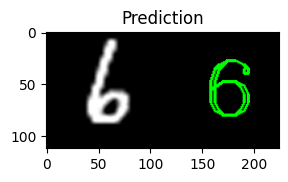

1/1 [==============================] - 0s 19ms/step


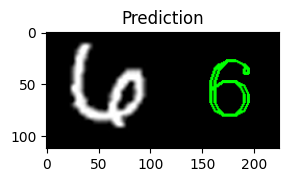

1/1 [==============================] - 0s 26ms/step


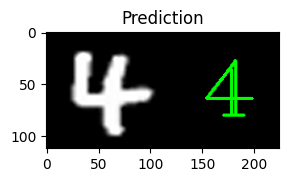

1/1 [==============================] - 0s 25ms/step


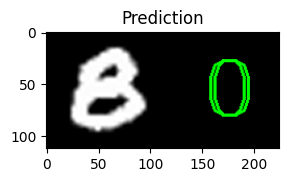

1/1 [==============================] - 0s 27ms/step


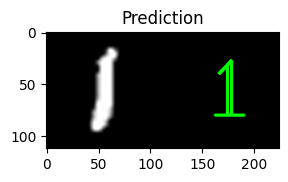

1/1 [==============================] - 0s 25ms/step


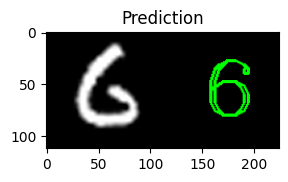

1/1 [==============================] - 0s 29ms/step


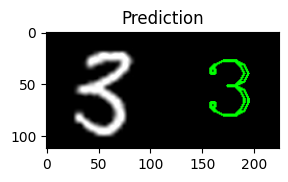

1/1 [==============================] - 0s 31ms/step


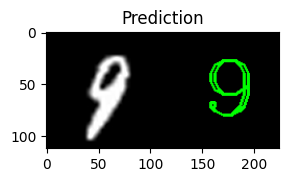

1/1 [==============================] - 0s 28ms/step


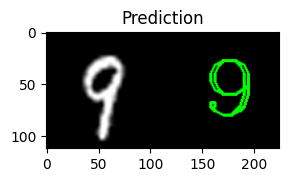

In [22]:
import cv2
import np

# 데이터를 다시 로드합니다 (이전에 스케일을 조정했기 때문에 다시 로드)
(x_train, y_train), (x_test, y_test)  = mnist.load_data()

def draw_test(name, pred, input_im):
    '''원본 이미지 옆에 예측된 클래스를 표시하는 함수'''
    # 검정색 배경을 만듭니다
    BLACK = [0,0,0]
    # 예측된 클래스 텍스트를 배치할 공간을 만들기 위해 원본 이미지를 오른쪽으로 확장합니다
    expanded_image = cv2.copyMakeBorder(input_im, 0, 0, 0, imageL.shape[0], cv2.BORDER_CONSTANT, value=BLACK)
    # 그레이스케일 이미지를 컬러로 변환합니다
    expanded_image = cv2.cvtColor(expanded_image, cv2.COLOR_GRAY2BGR)
    # 확장된 이미지에 예측된 클래스 텍스트를 넣습니다
    cv2.putText(expanded_image, str(pred), (150, 80), cv2.FONT_HERSHEY_COMPLEX_SMALL, 4, (0,255,0), 2)
    imshow(name, expanded_image)

for i in range(0, 10):
    # 테스트 데이터셋에서 무작위로 이미지를 가져옵니다
    rand = np.random.randint(0, len(x_test))
    input_im = x_test[rand]

    # 텍스트를 넣을 수 있도록 더 큰 크기로 이미지 크기를 조정합니다
    imageL = cv2.resize(input_im, None, fx=4, fy=4, interpolation=cv2.INTER_CUBIC)
    # 데이터를 reshape하여 네트워크에 입력할 수 있도록 합니다 (forward propagate)
    input_im = input_im.reshape(1, 28, 28, 1)

    # 예측을 얻습니다. numpy 배열에 저장된 값을 접근하기 위해 [0]을 사용합니다
    res = str(np.argmax(classifier.predict(input_im), axis=-1)[0])

    # 테스트 데이터 샘플 이미지에 레이블을 붙입니다
    draw_test("Prediction", res, np.uint8(imageL))
